## This aim of this notebook is to find the effect of snowfall on TTC delay patterns

### First, let's load and sort our weather (precipitation, snow) data

In [63]:
import pandas as pd
import matplotlib
import requests
import json
import csv

source = "weather_data/weather_data_2018.csv"

weather_df = pd.read_csv(source)

In [64]:
weather_df = weather_df[['date', 'temp', 'precip', 'snow']]

# Convert date column into datetime format
weather_df['date'] = pd.to_datetime(weather_df.date)
weather_df = weather_df.set_index('date')
weather_df = weather_df.sort_values('date')

In [71]:
# How many missing values are in our data set?
weather_df['snow'].isna().sum()
weather_df['snow'].notna().sum()

# More NaN values than non. Dataset quality isn't great since 
# we have no idea if there was no snow, or if there was no recording...

97

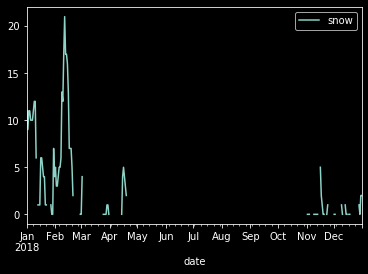

In [72]:
weather_df.plot(y='snow')

### The plot indicates that the missing values are mostly in the summer - early fall months.
### We can assume with moderate confidence that the missing values From May - November correspond with zeroes
### However, the missing values between March and May are problematic 

In [73]:
# Lets fill the NaN values with zero and note this limitation in our findings.

weather_df = weather_df.fillna(0)

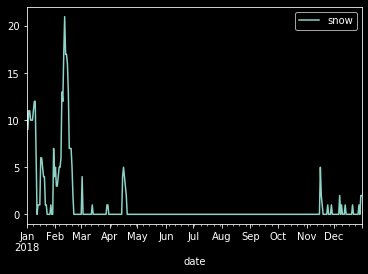

In [74]:
weather_df.plot(y='snow')

### What was the day with the most amount of snow?

In [75]:
weather_df.snow.idxmax()

Timestamp('2018-02-11 00:00:00')

In [76]:
weather_df.loc['2018-02-11']

temp      -2.9
precip     2.9
snow      21.0
Name: 2018-02-11 00:00:00, dtype: float64

## Second, let's load and analyze the TTC delay data

In [26]:
source_2 = 'ttc_data/streetcar_delay_2018.csv'

streetcar_df = pd.read_csv(source_2)
streetcar_df['Report Date'] = pd.to_datetime(streetcar_df['Report Date'])
streetcar_df = streetcar_df[['Report Date', 'Min Delay']]

In [27]:
streetcar_df.head(100)

,Report Date,Min Delay
0,2018-12-01,10.0
1,2018-12-01,35.0
2,2018-12-01,30.0
3,2018-12-01,10.0
4,2018-12-01,6.0
...,...,...
95,2018-12-03,16.0
96,2018-12-03,24.0
97,2018-12-03,10.0
98,2018-12-03,7.0


In [29]:
# This groups the data frame by date and adds everything in the group

sc_group = streetcar_df.groupby(['Report Date']).sum()

,Min Delay
Report Date,
2018-01-01,779.0
2018-01-02,750.0
2018-01-03,715.0
2018-01-04,595.0
2018-01-05,1077.0
...,...
2018-04-06,412.0
2018-04-07,346.0
2018-04-08,542.0


### Which day had the most delays?


In [77]:
sc_group['Min Delay'].idxmax()

Timestamp('2018-02-20 00:00:00')

In [78]:
sc_group.loc['2018-02-20']

Min Delay    1918.0
Name: 2018-02-20 00:00:00, dtype: float64

In [112]:
snow_sc_merged = sc_group.join(weather_df)

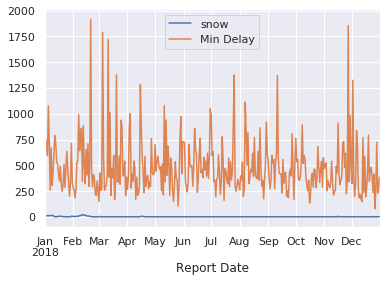

In [113]:
snow_sc_merged[['snow', 'Min Delay']].plot()

In [80]:
# The aggregate delay values are way higher than the snow data, so we need to normalize it...

snow_sc_merged['Min Delay'] = snow_sc_merged['Min Delay'] / 100

In [114]:
snow_sc_merged.corr()

# Suggests a weakly positive relationship between minimum delay and snow/precipitation

,Min Delay,temp,precip,snow
Min Delay,1.000000,-0.031096,0.210404,0.132248
temp,-0.031096,1.000000,0.066025,-0.424079
precip,0.210404,0.066025,1.000000,-0.005408
snow,0.132248,-0.424079,-0.005408,1.000000


## Lets visualize total delay vs snowfall

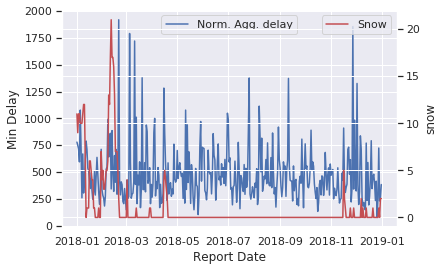

In [118]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

ax = sns.lineplot(x='Report Date', y='Min Delay', data= snow_sc_merged.reset_index(), label='Norm. Agg. delay')

ax2 = ax.twinx()
ax2 = sns.lineplot(x='Report Date', y='snow', data= snow_sc_merged.reset_index(), ax=ax2, color='r', label='Snow')

ax.legend()
plt.show()

## Initial Observations

    - Highest volume delays occured during winter
    - Would be interesting to find average agg. delay during winter vs non-winter months
    - Incomplete snowfall data during March and May months could hinder the accuracy of Observations
    - Snow spike in February might correspond with spike in agg. delay? 
    - Is there some link between first snow fall and TTC delays? Huge delay spike around December
    - Definitely need more data for higher resolution! 